<a href="https://colab.research.google.com/github/mostafa-ja/Data-Mining-fall-2023/blob/main/Data_Mining1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
tree = ET.parse('/content/post.xml')
root = tree.getroot()

In [7]:
#create a pandas dataframe from the file

# Initialize empty lists to store data
ids = []
post_types = []
ParentId = []
accepted_answer_ids = []
creation_dates = []
scores = []
view_counts = []
bodies = []
owner_user_ids = []
last_editor_user_ids = []
last_editor_display_names = []
last_edit_dates = []
last_activity_dates = []
titles = []
tags = []
answer_counts = []
comment_counts = []
favorite_counts = []
community_owned_dates = []

for post in root.findall('row'):
    ids.append(post.get('Id'))
    post_types.append(post.get('PostTypeId'))
    ParentId.append(post.get('ParentId'))
    accepted_answer_ids.append(post.get('AcceptedAnswerId'))
    creation_dates.append(post.get('CreationDate'))
    scores.append(post.get('Score'))
    view_counts.append(post.get('ViewCount'))
    bodies.append(post.get('Body'))
    owner_user_ids.append(post.get('OwnerUserId'))
    last_editor_user_ids.append(post.get('LastEditorUserId'))
    last_editor_display_names.append(post.get('LastEditorDisplayName'))
    last_edit_dates.append(post.get('LastEditDate'))
    last_activity_dates.append(post.get('LastActivityDate'))
    titles.append(post.get('Title'))
    tags.append(post.get('Tags'))
    answer_counts.append(post.get('AnswerCount'))
    comment_counts.append(post.get('CommentCount'))
    favorite_counts.append(post.get('FavoriteCount'))
    community_owned_dates.append(post.get('CommunityOwnedDate'))

# Create a DataFrame using the lists
data = {
    'id': ids,
    'PostTypeId': post_types,
    'ParentId': ParentId,
    'AcceptedAnswerId': accepted_answer_ids,
    'CreationDate': creation_dates,
    'Score': scores,
    'ViewCount': view_counts,
    'Body': bodies,
    'OwnerUserId': owner_user_ids,
    'LastEditorUserId': last_editor_user_ids,
    'LastEditorDisplayName': last_editor_display_names,
    'LastEditDate': last_edit_dates,
    'LastActivityDate': last_activity_dates,
    'Title': titles,
    'Tags': tags,
    'AnswerCount': answer_counts,
    'CommentCount': comment_counts,
    'FavoriteCount': favorite_counts,
    'CommunityOwnedDate': community_owned_dates
}

df = pd.DataFrame(data)
df.head(3)

,id,PostTypeId,ParentId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,CommunityOwnedDate
0,4,1,None,7,2008-07-31T21:42:52.667,322,21888,<p>I want to use a track-bar to change a form'...,8,451518,Rich B,2014-07-28T10:02:50.557,2014-12-20T17:18:47.807,When setting a form's opacity should I use a d...,<c#><winforms><type-conversion><opacity>,13,1,27,2012-10-31T16:42:47.213
1,6,1,None,31,2008-07-31T22:08:08.620,140,10912,<p>I have an absolutely positioned <code>div</...,9,1350209,Rich B,2014-06-26T04:57:13.750,2014-10-10T05:55:36.033,Why doesn't the percentage width child in abso...,<html><css><css3><internet-explorer-7>,5,0,7,None
2,7,2,4,None,2008-07-31T22:17:57.883,242,None,<p>An explicit cast to double isn't necessary....,9,967315,None,2012-10-14T11:50:16.703,2012-10-14T11:50:16.703,None,None,None,0,None,None


In [8]:
df.columns

Index(['id', 'PostTypeId', 'ParentId', 'AcceptedAnswerId', 'CreationDate',
       'Score', 'ViewCount', 'Body', 'OwnerUserId', 'LastEditorUserId',
       'LastEditorDisplayName', 'LastEditDate', 'LastActivityDate', 'Title',
       'Tags', 'AnswerCount', 'CommentCount', 'FavoriteCount',
       'CommunityOwnedDate'],
      dtype='object')

In [9]:
df['AcceptedAnswerId']

0         7
1        31
2      None
3      1404
4      1248
       ... 
216     519
217    None
218    None
219    None
220    None
Name: AcceptedAnswerId, Length: 221, dtype: object

In [10]:
df.drop(columns=['AcceptedAnswerId','OwnerUserId', 'LastEditorUserId', 'LastEditorDisplayName','LastEditDate', 'LastActivityDate','CommunityOwnedDate'], inplace=True)

In [11]:
df['CreationDate'] = pd.to_datetime(df['CreationDate'])

In [12]:
# Count the number of null values in each column
null_counts = df.isnull().sum()

# Display the count of null values for each column
print(null_counts)


id                 0
PostTypeId         0
ParentId          71
CreationDate       0
Score              0
ViewCount        150
Body               0
Title            150
Tags             150
AnswerCount      150
CommentCount       0
FavoriteCount    159
dtype: int64


# Question Analysis

PostTypeId field :

1=Questions

2=Answers

In [13]:
df_question = df[df['PostTypeId'] == '1'].copy()
df_question.drop(columns=['PostTypeId','ParentId'], inplace=True)

In [14]:
columns_to_convert = ['id','Score', 'ViewCount', 'AnswerCount', 'CommentCount', 'FavoriteCount']
for col in columns_to_convert:
    df_question[col] = df_question[col].fillna(0).astype(int)

In [ ]:
def clean_tags(tags_string):
    tags_string = ' '.join(tag.strip('<>') for tag in tags_string.split('>'))
    cleaned_tags = ' '.join(tag for tag in tags_string.split('<'))
    return cleaned_tags.replace('-', ' ')

# Apply the function directly to create the 'Cleaned_Tags' column
df_question['Cleaned_Tags'] = df_question['Tags'].apply(clean_tags)
df_question.drop(columns=['Tags'], inplace=True)
df_question['Cleaned_Tags']

In [ ]:
df_question['Cleaned_Tags']

0       c# winforms type conversion opacity 
1         html css css3 internet explorer 7 
3                          c# .net datetime 
4                               c# datediff 
6      html browser timezone timezoneoffset 
                       ...                  
207              python osx fonts photoshop 
208                       .net web services 
211                c# winforms data binding 
214                python windows image pdf 
216                ruby on rails ruby crash 
Name: Cleaned_Tags, Length: 71, dtype: object

In [15]:
df_question.columns

Index(['id', 'CreationDate', 'Score', 'ViewCount', 'Body', 'Title', 'Tags',
       'AnswerCount', 'CommentCount', 'FavoriteCount'],
      dtype='object')

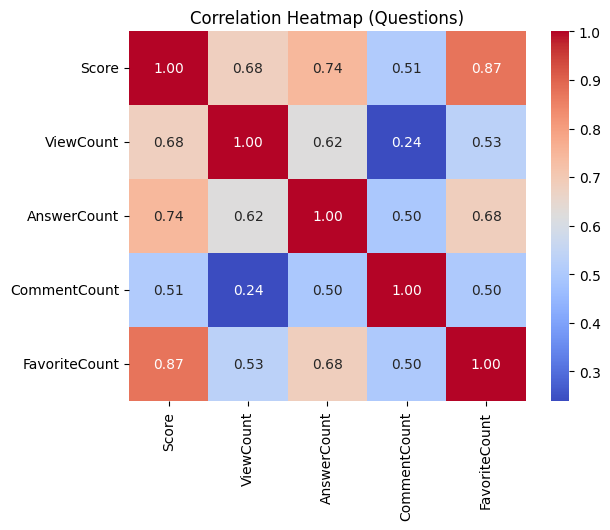

In [16]:
# Drop the column to ignore
column_to_ignore = ['id', 'CreationDate','Body','Title', 'Tags']
numeric_df_question = df_question.drop(columns=column_to_ignore)

# Calculate correlation matrix
correlation_matrix = numeric_df_question.corr()

fig = plt.figure()

fig.patch.set_facecolor('None')
#fig.patch.set_alpha(0.7)

heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Questions)')

# Set the background of the plot to be transparent
heatmap.patch.set_facecolor('none')
heatmap.patch.set_alpha(0.1)
plt.show()

**IMPORTANT** : The diagonal plots in a Seaborn pairplot show the distribution of the values within each column. By default, Seaborn plots histograms for numerical columns and bar plots for categorical columns on the diagonal.

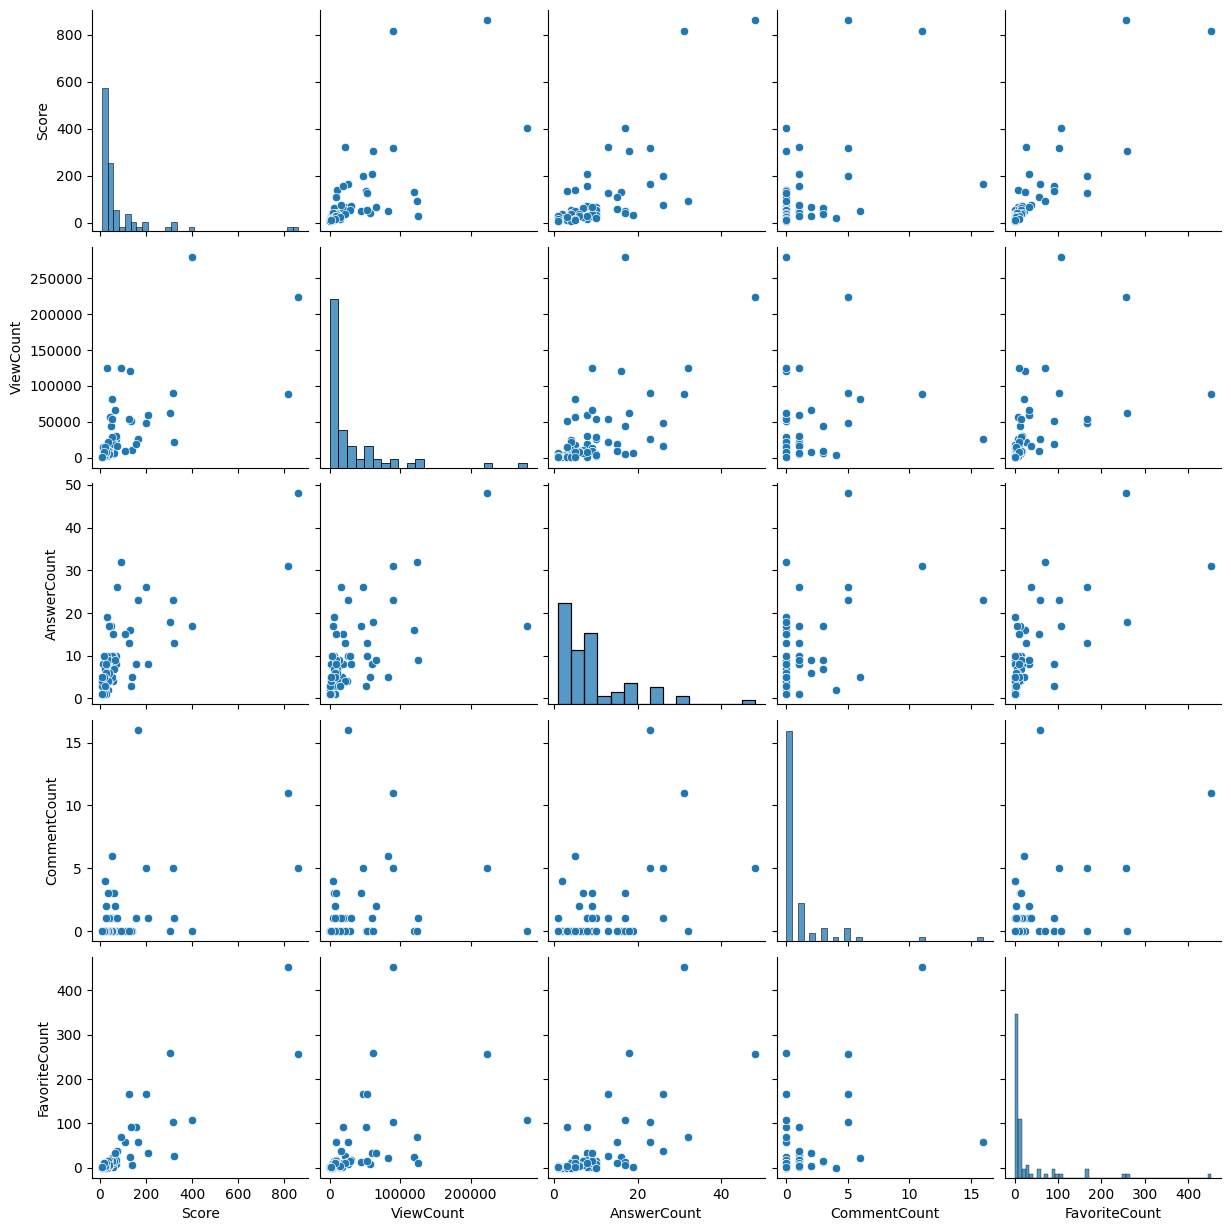

In [17]:
# Plotting pairplot to show correlations between all columns
sns.pairplot(numeric_df_question)
plt.show()

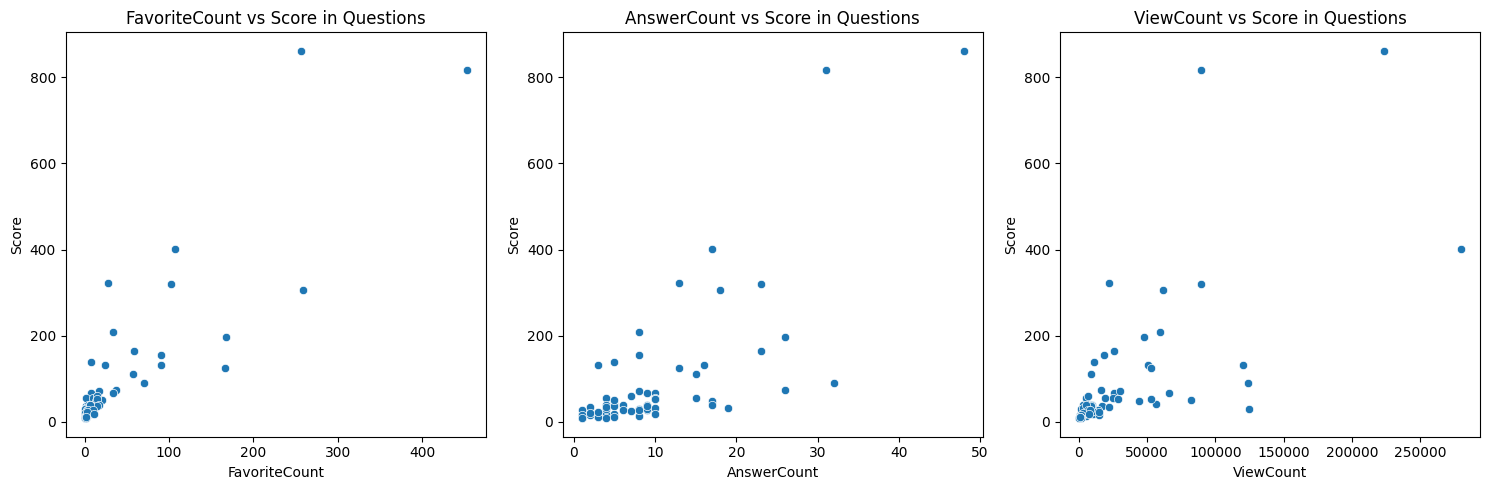

In [19]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Column1 against other columns
for i, col in enumerate(['FavoriteCount', 'AnswerCount', 'ViewCount']):
    sns.scatterplot(x=col, y='Score', data=df_question, ax=axes[i])
    axes[i].set_title(f'{col} vs Score in Questions')

plt.tight_layout()
plt.show()

# Answer Analysis

In [38]:
df_answer = df[df['PostTypeId'] == '2'].copy()
df_answer.columns

Index(['id', 'PostTypeId', 'ParentId', 'CreationDate', 'Score', 'ViewCount',
       'Body', 'Title', 'Tags', 'AnswerCount', 'CommentCount',
       'FavoriteCount'],
      dtype='object')

In [39]:
df_answer.drop(columns=['PostTypeId','ViewCount','Title','Tags','AnswerCount','FavoriteCount'], inplace=True)

In [40]:
columns_to_convert = ['id','ParentId','Score','CommentCount']
for col in columns_to_convert:
    df_answer[col] = df_answer[col].fillna(0).astype(int)

In [41]:
df_answer.columns

Index(['id', 'ParentId', 'CreationDate', 'Score', 'Body', 'CommentCount'], dtype='object')

In [42]:
# Count the number of null values in each column
null_counts = df_answer.isnull().sum()

# Display the count of null values for each column
print(null_counts)

id              0
ParentId        0
CreationDate    0
Score           0
Body            0
CommentCount    0
dtype: int64


In [43]:
# Merge based on 'ID' in df1 and 'ParentId' in df2
merged_df = pd.merge(df_answer, df_question, left_on='ParentId', right_on='id', how='inner', suffixes=('_A', '_Q'))

merged_df.head(3)

,id_A,ParentId,CreationDate_A,Score_A,Body_A,CommentCount_A,id_Q,CreationDate_Q,Score_Q,ViewCount,Body_Q,Title,Tags,AnswerCount,CommentCount_Q,FavoriteCount
0,7,4,2008-07-31 22:17:57.883,242,<p>An explicit cast to double isn't necessary....,0,4,2008-07-31 21:42:52.667,322,21888,<p>I want to use a track-bar to change a form'...,When setting a form's opacity should I use a d...,<c#><winforms><type-conversion><opacity>,13,1,27
1,78,4,2008-08-01 13:53:06.357,27,<p>It sounds like <code>this.Opacity</code> is...,0,4,2008-07-31 21:42:52.667,322,21888,<p>I want to use a track-bar to change a form'...,When setting a form's opacity should I use a d...,<c#><winforms><type-conversion><opacity>,13,1,27
2,86,4,2008-08-01 14:23:28.087,61,<p>A more generic answer for the generic quest...,0,4,2008-07-31 21:42:52.667,322,21888,<p>I want to use a track-bar to change a form'...,When setting a form's opacity should I use a d...,<c#><winforms><type-conversion><opacity>,13,1,27


In [44]:
merged_df['timeDiffrence(Hours)'] = (merged_df['CreationDate_A'] - merged_df['CreationDate_Q']).dt.total_seconds() / 60 / 60 #based on hours

In [45]:
merged_df.columns

Index(['id_A', 'ParentId', 'CreationDate_A', 'Score_A', 'Body_A',
       'CommentCount_A', 'id_Q', 'CreationDate_Q', 'Score_Q', 'ViewCount',
       'Body_Q', 'Title', 'Tags', 'AnswerCount', 'CommentCount_Q',
       'FavoriteCount', 'timeDiffrence(Hours)'],
      dtype='object')

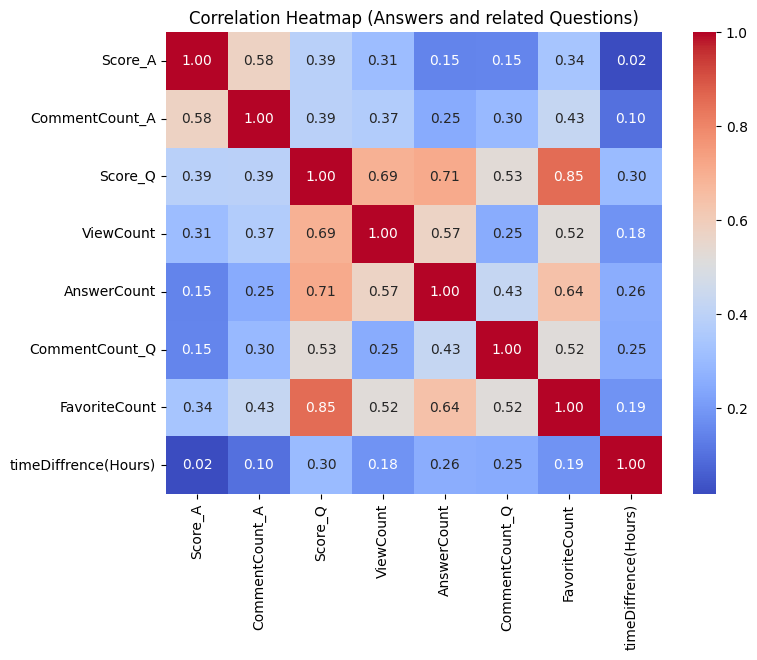

In [46]:
numeric_merged_df= merged_df.drop(columns=['id_A', 'ParentId', 'CreationDate_A','Body_A','id_Q',
       'CreationDate_Q','Body_Q', 'Title','Tags'])

# Calculate correlation matrix
correlation_matrix = numeric_merged_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Answers and related Questions)')
plt.show()

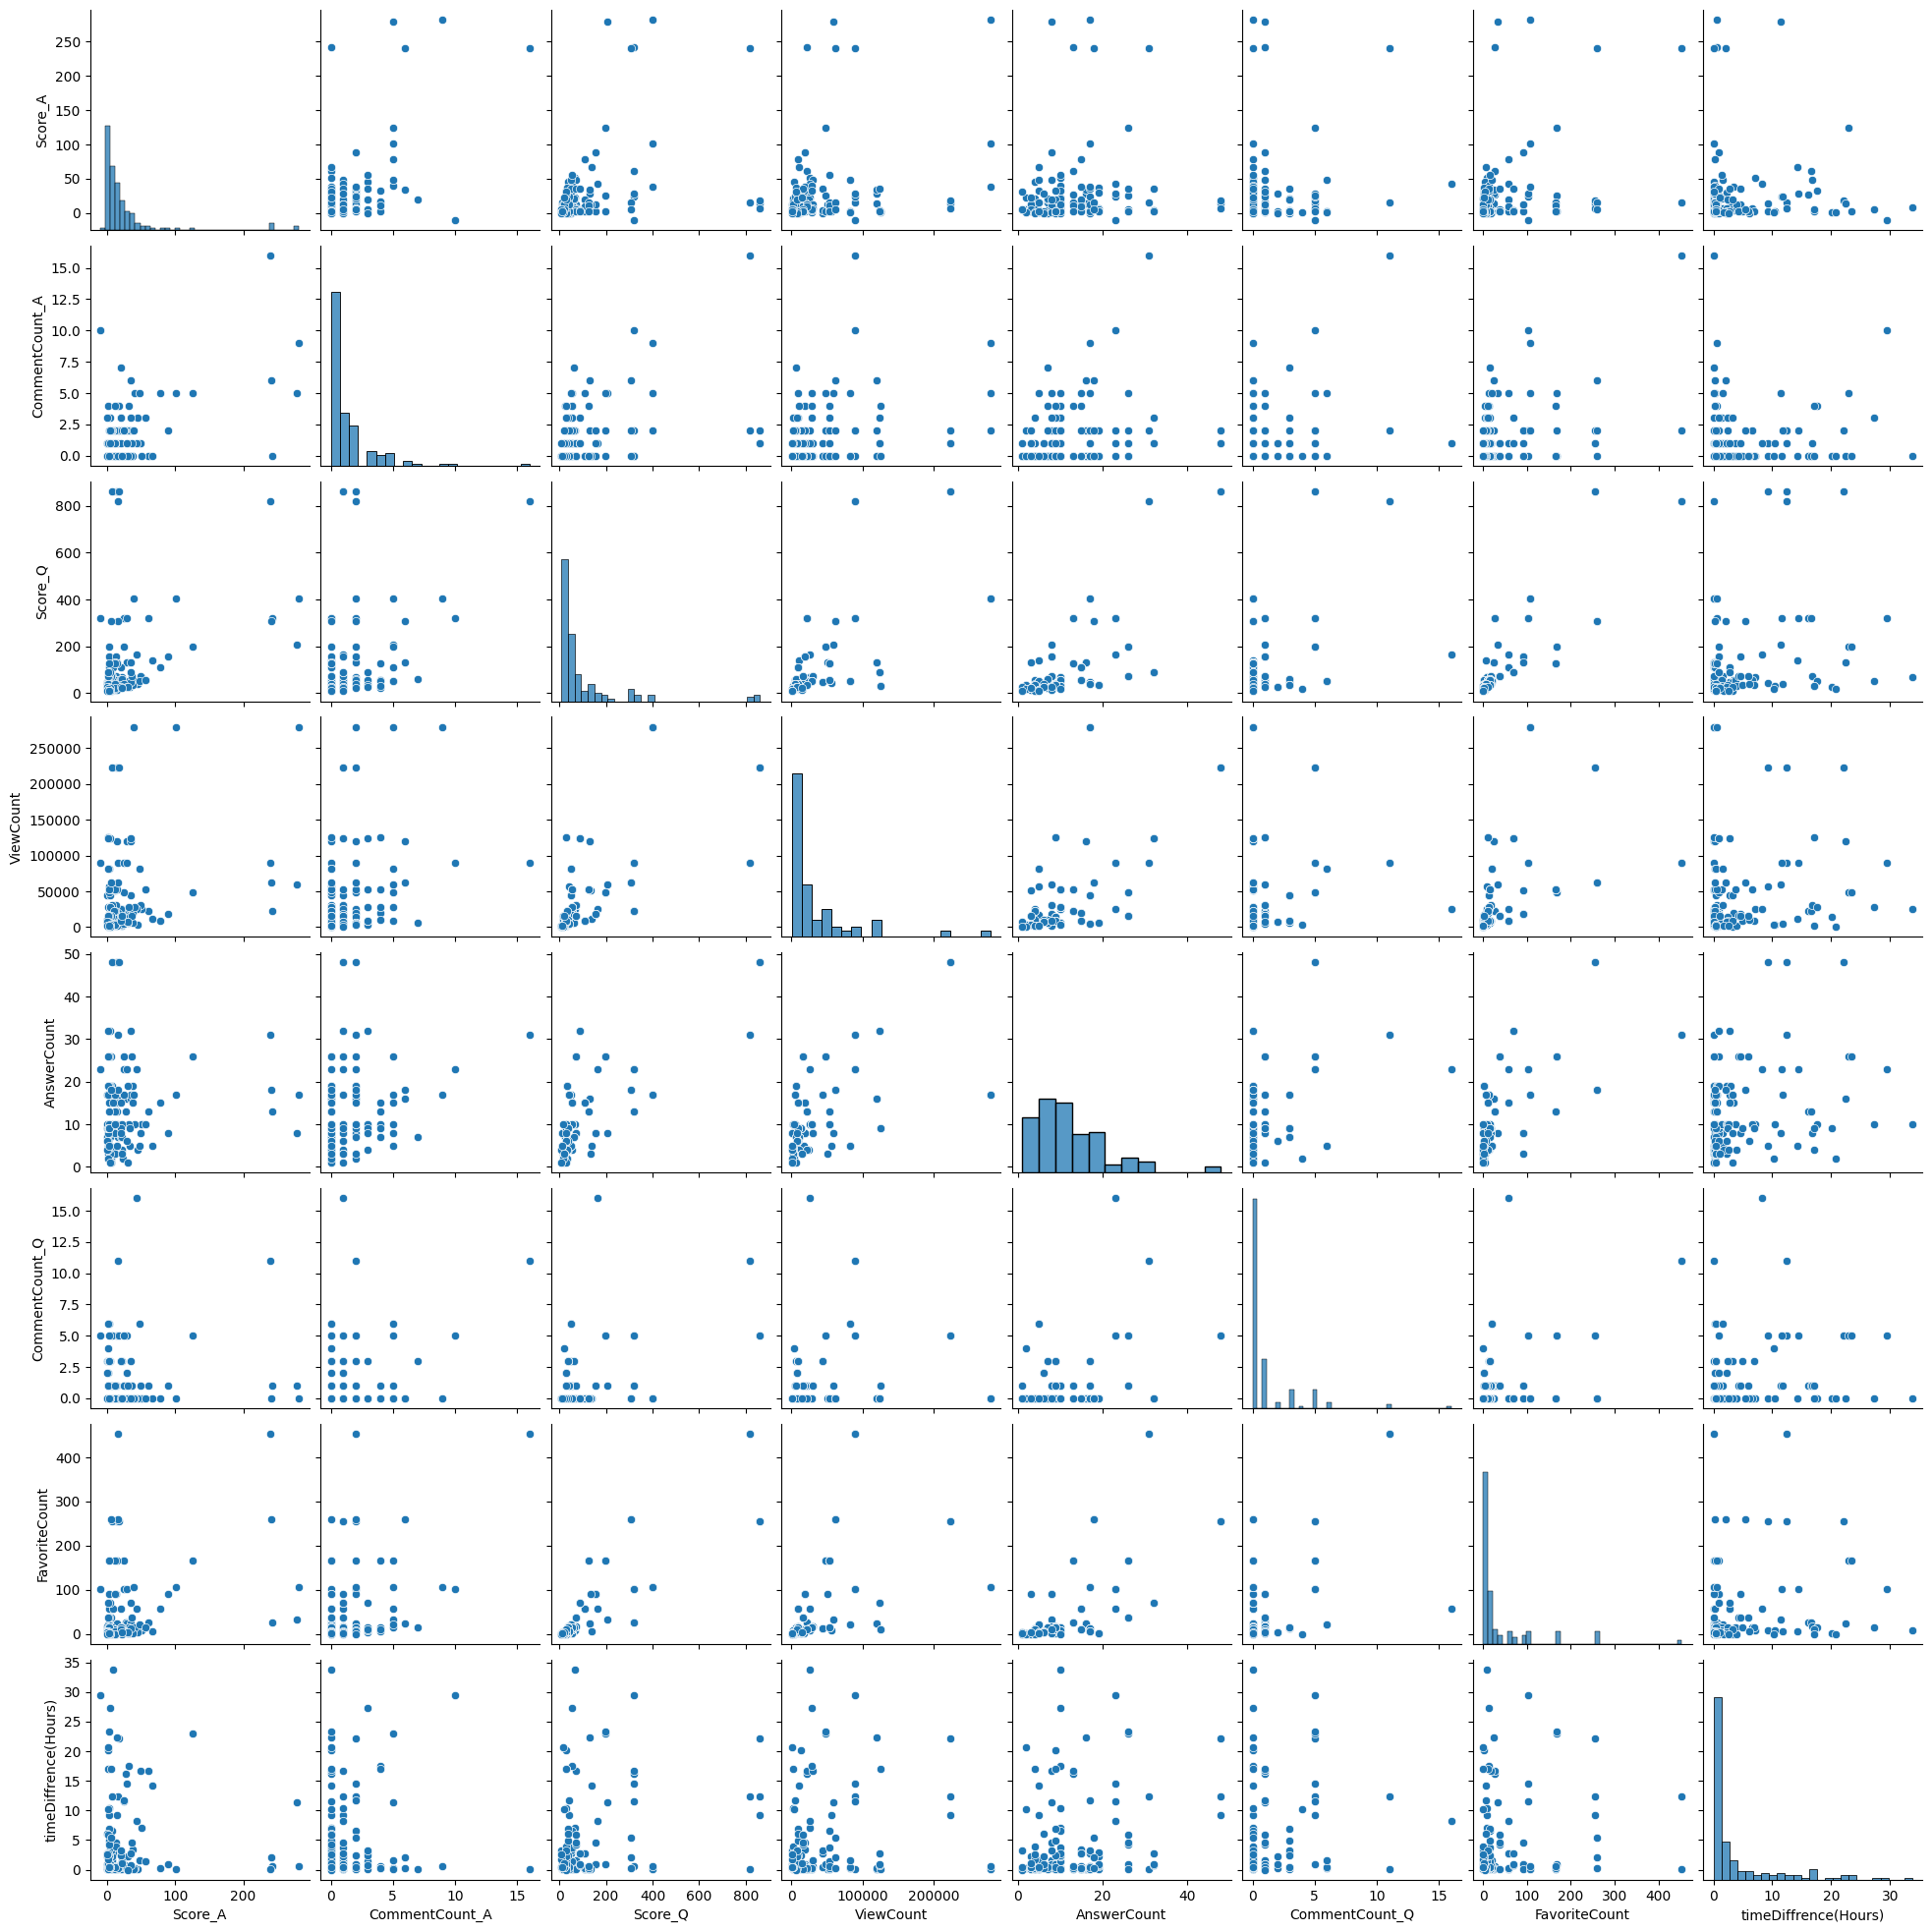

In [47]:
# Plotting pairplot to show correlations between all columns
sns.pairplot(numeric_merged_df)
plt.show()

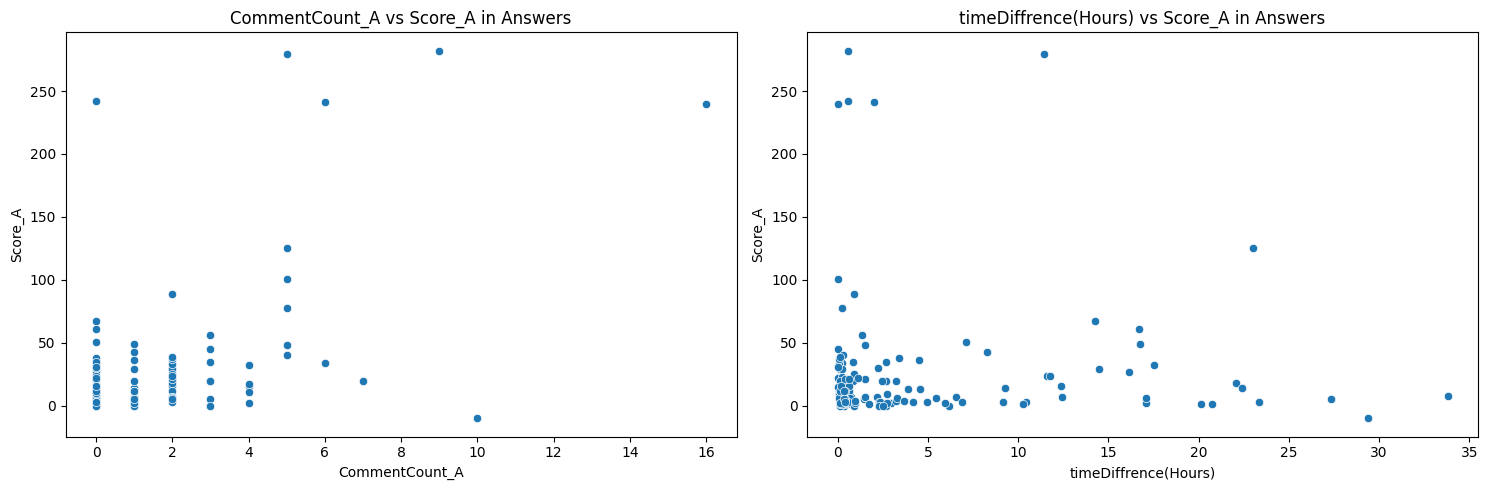

In [48]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Column1 against other columns
for i, col in enumerate(['CommentCount_A','timeDiffrence(Hours)']):
    sns.scatterplot(x=col, y='Score_A', data=numeric_merged_df, ax=axes[i])
    axes[i].set_title(f'{col} vs Score_A in Answers')

plt.tight_layout()
plt.show()

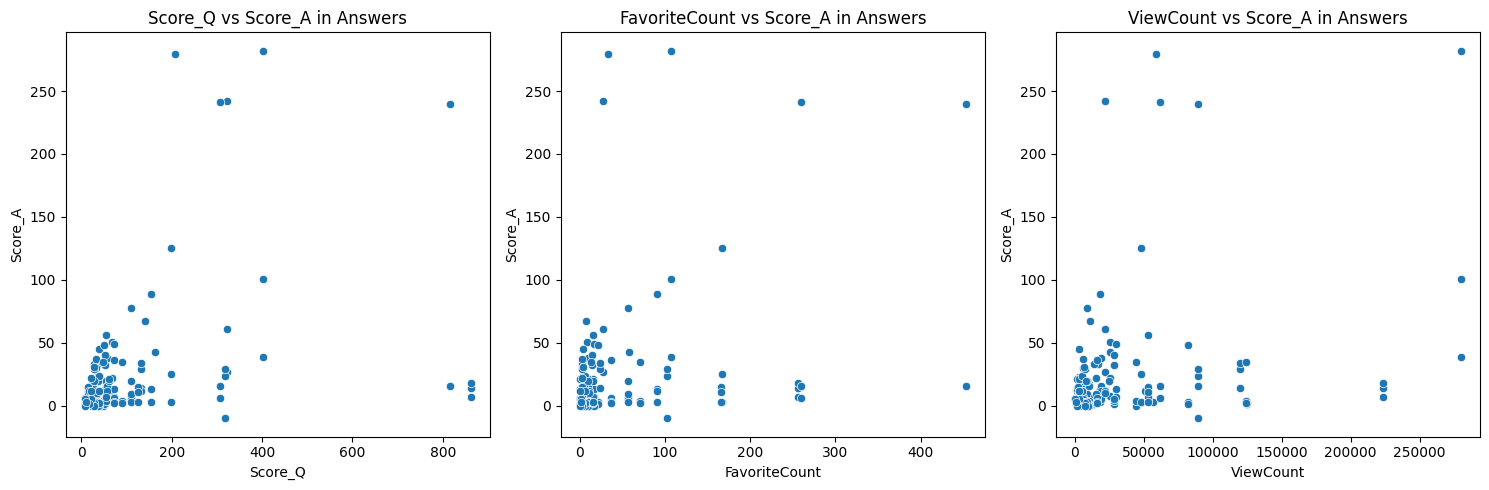

In [49]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Column1 against other columns
for i, col in enumerate(['Score_Q', 'FavoriteCount', 'ViewCount']):
    sns.scatterplot(x=col, y='Score_A', data=numeric_merged_df, ax=axes[i])
    axes[i].set_title(f'{col} vs Score_A in Answers')

plt.tight_layout()
plt.show()